## Homework #1: Fitting a Model to Data Using Linear Algebra

Janelle Sy

September 26, 2022 

***Edited on October 7 to fix matrices! I previously did not square sigma_y***

**Exercise 1:** Using the standard linear algebra method of this Section, fit
the straight line $y = m x + b$ to the x, y, and $σ_{y}$ values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for $σ_{x}$ and $ρ_{xy}$. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance $σ^{2}_{m}$ on the slope of
the line?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
data_1 = np.loadtxt('data.txt')
x_1 = data_1[:,0][4:]
y_1 = data_1[:,1][4:]
sigma_y1 = data_1[:,2][4:]

We will now find the best-fit values for the parameters m and b, which are just the components of the column vector X from the following equation:

$\left[\begin{array}{ccc}b \\ m\end{array}\right] = X = [A^{T}C^{-1}A]^{-1}[A^{T}C^{-1}Y]$

In [3]:
def linalg_linearfit(x, y, sigma_y):
    """Defining a function that will calculate the best fit values for 
    parameters b & m for a linear line"""
    
    Y = np.reshape(y,(len(y),1))

    A = np.ones(len(x))
    A = np.column_stack([A, x])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.solve(C, np.identity(len(x)))
    X = np.linalg.inv(np.transpose(A)@C_inv@A)@np.transpose(A)@C_inv@Y
    variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))
    
    print('the best fit b and m values respectively are:', X[0][0], '&', X[1][0])

    return X, variance ### this is where we calculate b and m


In [4]:
#defining a function to fit the best fit line
def linefit(x,m,b):
    return m*x + b

In [5]:
results_1 = linalg_linearfit(x_1, y_1, sigma_y1)
x = np.linspace(0,300)
best_linefit1 = linefit(x, results_1[0][1][0], results_1[0][0][0])

the best fit b and m values respectively are: 34.047727757543726 & 2.2399208316310943


<ipython-input-3-001c1c4c716b>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


We get the standard uncertainty variance in our best-fit parameters from $\left[\begin{array}{ccc} \sigma_{b}^{2} & \sigma_{mb} \\ \sigma_{mb} & \sigma_{m}^{2} \\ \end{array}\right] = [A^{T}C^{-1}A]^{-1}$

In [6]:
# Standard Uncertainty Variance
print(results_1[1])
print('The standard uncertainty variance for b and m respectively are', results_1[1][0][0], '&', results_1[1][1][1])

[[18.24616675         nan]
 [        nan  0.10778048]]
The standard uncertainty variance for b and m respectively are 18.246166749268177 & 0.10778047654050076


<ipython-input-7-57a8cb1a62c1>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.errorbar(x_1,y_1,yerr = sigma_y1, fmt = '*y', markersize = 10, Label = 'Data')


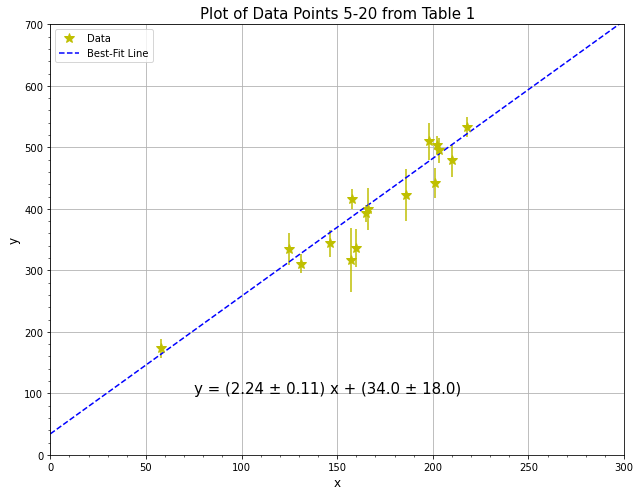

In [7]:
# Let's visualize the data!
plt.figure(figsize=(9,7))
plt.errorbar(x_1,y_1,yerr = sigma_y1, fmt = '*y', markersize = 10, Label = 'Data')
plt.plot(x,best_linefit1, '--b', label = 'Best-Fit Line')

plt.xlim(0,300)
plt.ylim(0,700)

plt.title('Plot of Data Points 5-20 from Table 1', size = 15)
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)

equation_1 = 'y = (' + str(np.round(results_1[0][1][0],2)) + ' \u00B1 ' + str(np.round(results_1[1][1][1],2)) +') x + (' + str(np.round(results_1[0][0][0],0)) + ' \u00B1 ' + str(np.round(results_1[1][0][0],0)) + ')'
plt.text(75,100, equation_1, fontsize = 15)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

**Exercise 2:** Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard
uncertainty variance $σ^{2}_{m}$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you
have included beyond those used in Exercise 1?

In [8]:
# Load data
data_2 = np.loadtxt('data.txt')
x_2 = data_2[:,0]
y_2 = data_2[:,1]
sigma_y2 = data_2[:,2]

In [9]:
results_2 = linalg_linearfit(x_2, y_2, sigma_y2)
x = np.linspace(0,300)
best_linefit2 = linefit(x, results_2[0][1][0], results_2[0][0][0])

the best fit b and m values respectively are: 213.2734919759601 & 1.0767475241683302


<ipython-input-3-001c1c4c716b>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


In [10]:
# Standard Uncertainty Variance
print(results_2[1])
print('The standard uncertainty variance for b and m respectively are', results_2[1][0][0], '&', results_2[1][1][1])

[[14.39403311         nan]
 [        nan  0.07740678]]
The standard uncertainty variance for b and m respectively are 14.394033107162208 & 0.07740678316575608


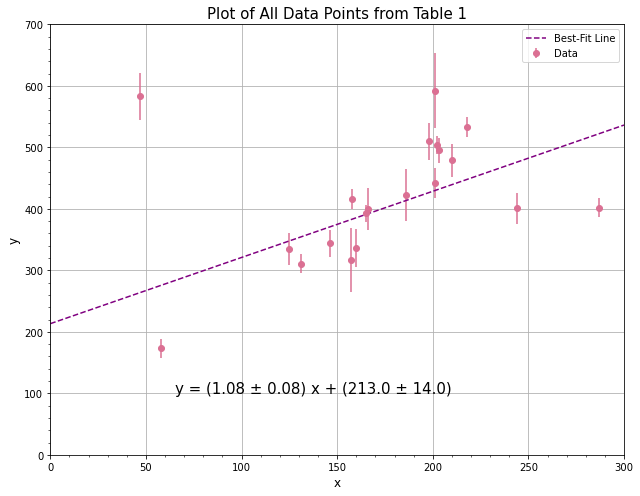

In [11]:
plt.figure(figsize=(9,7))
plt.errorbar(x_2,y_2,yerr = sigma_y2, fmt = 'o', color = 'palevioletred', label = 'Data')
plt.plot(x,best_linefit2, '--', color = 'purple', label = 'Best-Fit Line')

plt.xlim(0,300)
plt.ylim(0,700)

plt.title('Plot of All Data Points from Table 1', size = 15)
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)

equation_2 = 'y = (' + str(np.round(results_2[0][1][0],2)) + ' \u00B1 ' + str(np.round(results_2[1][1][1],2)) +') x + (' + str(np.round(results_2[0][0][0],0)) + ' \u00B1 ' + str(np.round(results_2[1][0][0],0)) + ')'
plt.text(65,100, equation_2, fontsize = 15)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

The full dataset includes points that are outliers; linear fitting methods are very sensitive to outliers. 

**Exercise 3:** Generalize the method of this Section to fit a general quadratic
(second order) relationship. Add another column to matrix A containing the
values $x^{2}_{i}$, and another element to vector $X$ (call it *q*). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship
$g(x) = q x^{2} + m x + b$

In [12]:
# Load Data
data_3 = np.loadtxt('data.txt')
x_3 = data_3[:,0][4:]
y_3 = data_3[:,1][4:]
sigma_y3 = data_3[:,2][4:]

For a quadratic (second order) relationship, we get:

$\left[\begin{array}{ccc} b \\ m \\ q \end{array}\right] = X = [A^{T}C^{-1}A]^{-1}[A^{T}C^{-1}Y]$

In [13]:
# Constructing Matrices for Best Fit Quadratic
Y_3 = np.reshape(y_3,(len(y_3),1))

A_3 = np.ones(len(x_3))
A_3 = np.column_stack([A_3, x_3])
A_3 = np.column_stack([A_3, x_3**2])

C_3 = np.diag(sigma_y3**2)

C3_inv = np.linalg.solve(C_3,np.identity(16))

print(A_3)
print(C_3)
print(Y_3)

[[1.0000e+00 2.0300e+02 4.1209e+04]
 [1.0000e+00 5.8000e+01 3.3640e+03]
 [1.0000e+00 2.1000e+02 4.4100e+04]
 [1.0000e+00 2.0200e+02 4.0804e+04]
 [1.0000e+00 1.9800e+02 3.9204e+04]
 [1.0000e+00 1.5800e+02 2.4964e+04]
 [1.0000e+00 1.6500e+02 2.7225e+04]
 [1.0000e+00 2.0100e+02 4.0401e+04]
 [1.0000e+00 1.5700e+02 2.4649e+04]
 [1.0000e+00 1.3100e+02 1.7161e+04]
 [1.0000e+00 1.6600e+02 2.7556e+04]
 [1.0000e+00 1.6000e+02 2.5600e+04]
 [1.0000e+00 1.8600e+02 3.4596e+04]
 [1.0000e+00 1.2500e+02 1.5625e+04]
 [1.0000e+00 2.1800e+02 4.7524e+04]
 [1.0000e+00 1.4600e+02 2.1316e+04]]
[[ 441.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.  225.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.  729.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.  196.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.

In [14]:
X3_left = np.linalg.multi_dot([np.transpose(A_3), C3_inv, A_3])          
X3_right = np.linalg.multi_dot([np.transpose(A_3), C3_inv, Y_3])

X3_left_inv = np.linalg.solve(X3_left, np.identity(3))
X_3 = np.dot(X3_left_inv,X3_right)

print('the best fit b, m, and q values respectively are:', X_3)

# defining a function to fit the best fit line
def quadfit(x,m,b,q):
   return q*x**2 + m*x + b

x = np.linspace(0,300)
best_quadfit = quadfit(x, X_3[1], X_3[0], X_3[2])

the best fit b, m, and q values respectively are: [[7.28946265e+01]
 [1.59605045e+00]
 [2.29888841e-03]]


In [15]:
# Standard Uncertainty Variance
variance = np.sqrt(X3_left_inv)
print(variance)
print('the standard uncertainty variances for b, m, and q respectively are the diagonal elements of the matrix above')

[[3.89115552e+01            nan 2.64386948e-01]
 [           nan 5.79747913e-01            nan]
 [2.64386948e-01            nan 2.03385871e-03]]
the standard uncertainty variances for b, m, and q respectively are the diagonal elements of the matrix above


<ipython-input-15-be427b0943f9>:2: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(X3_left_inv)


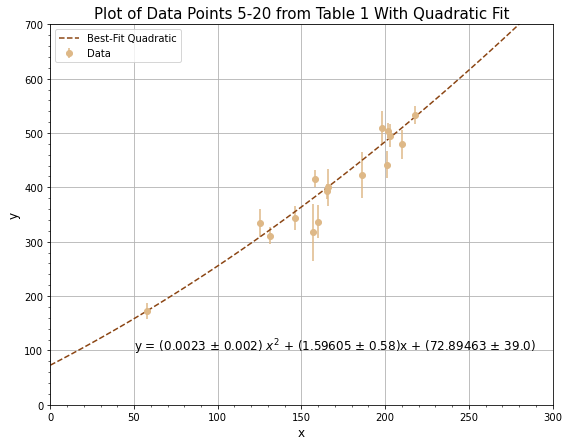

In [16]:
plt.figure(figsize=(9,7))
plt.errorbar(x_3,y_3,yerr = sigma_y3, fmt = 'o', color = 'burlywood', label = 'Data')
plt.plot(x,best_quadfit, '--', color = 'saddlebrown', label = 'Best-Fit Quadratic')

plt.xlim(0,300)
plt.ylim(0,700)

plt.title('Plot of Data Points 5-20 from Table 1 With Quadratic Fit', size = 15)
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)

equation_3 = 'y = (' + str(np.round(X_3[2][0],5)) + ' \u00B1 ' + str(np.round(variance[2][2],4)) + ') $x^{2}$ + (' + str(np.round(X_3[1][0],5)) + ' \u00B1 ' + str(np.round(variance[1][1],2)) + ')x + (' + str(np.round(X_3[0][0],5)) + ' \u00B1 ' + str(np.round(variance[0][0],0)) + ')'
plt.text(50,100, equation_3, fontsize = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

something must have gone wrong here because the error for b is bigger than the actual value 

**Exercise #8** Compute the standard uncertainty $σ^{2}_{m}$ obtained for the slope of the line found by the standard fit you did in Exercise 2. Now make **jackknife** (20 trials) and **bootstrap** estimates for the uncertainty $σ^{2}_{m}$. How do the uncertainties compare and which seems most reasonable, given the data and uncertainties on the data?

Previously we found the standard uncertainty for b & m to be $11.402404512198842$ and $0.0003360337544997594$ respectively in exercise 2. Now let's do a bootstrapping estimate for the uncertainty:


In [17]:
import random

In [18]:
# Load Data
data = np.loadtxt('data.txt')
x = data[:,0]
y = data[:,1]
sigma_y = data_3[:,2]
M = 20 #number of trials

Here, I am defining new linear fit functions so that it is easier to return b and m for our bootstrap function:

In [19]:
def linfit_b(x, y, sigma_y):
    """Defining a function that will calculate the best fit values for 
    parameters b & m for a linear line"""
    
    Y = np.reshape(y,(len(y),1))

    A = np.ones(len(x))
    A = np.column_stack([A, x])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.solve(C, np.identity(len(x)))
    X_left = np.linalg.multi_dot([np.transpose(A), C_inv, A])
    X_right = np.linalg.multi_dot([np.transpose(A), C_inv, Y])

    Xleft_inv = np.linalg.solve(X_left, np.identity(2))
    X = np.dot(Xleft_inv,X_right)
    #print('the best fit b and m values respectively are:', X[0][0], '&', X[1][0])

    return np.float(X[0]) ### this is where we calculate b 


In [20]:
def linfit_m(x, y, sigma_y):
    """Defining a function that will calculate the best fit values for 
    parameters b & m for a linear line"""
    
    Y = np.reshape(y,(len(y),1))

    A = np.ones(len(x))
    A = np.column_stack([A, x])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.solve(C, np.identity(len(x)))
    X_left = np.linalg.multi_dot([np.transpose(A), C_inv, A])
    X_right = np.linalg.multi_dot([np.transpose(A), C_inv, Y])

    Xleft_inv = np.linalg.solve(X_left, np.identity(2))
    X = np.dot(Xleft_inv,X_right)
    #print('the best fit b and m values respectively are:', X[0][0], '&', X[1][0])

    return np.float(X[1]) ### this is where we calculate m

In [21]:
def bootstrap(x, y, sigma_y, M, m, b):
    bootstrapped_b = []
    bootstrapped_m = []
    
    for j in range(M): #resampling of x (with replacement)
        index = np.random.randint(0,len(x), len(x))
        sample = x[index]
        
        calculated_b = linfit_b(sample, y, sigma_y)
        calculated_m = linfit_m(sample, y, sigma_y)
        
        bootstrapped_b.append(calculated_b)
        bootstrapped_m.append(calculated_m)
        
        uncertainty_var_m = 1/M * (np.sum(calculated_m - m))**2
        uncertainty_var_b = 1/M * (np.sum(calculated_b - b))**2
        
    return uncertainty_var_m, uncertainty_var_b

In [22]:
bestfit_m = results_2[0][1][0]
bestfit_b = results_2[0][0][0]
    
bootstrap_data = bootstrap(x, y, sigma_y, M, bestfit_m, bestfit_b)
print(bootstrap_data) #the variance gets better with more M trials

(0.09152918250797253, 2686.0719187134423)


Now, jackknife sampling:

In [23]:
import random

In [24]:
# Load Data
data = np.loadtxt('data.txt')
x = data[:,0]
y = data[:,1]
sigma_y = data_3[:,2]
N = 20 #number of trials

In [25]:
def jackknife_estimator(x, method):
    n = len(x)
    index = np.arange(n)
    return np.sum(method(x[index != i], y[index != i], sigma_y[index != i]) for i in range(n))/(n)

In [26]:
jk_m = jackknife_estimator(x, linfit_m)
jk_b = jackknife_estimator(x, linfit_b)

print('The estimated jackknife value for m is:', jk_m)
print('The estimated jackknife value for b is:', jk_b)

The estimated jackknife value for m is: 1.0752545538219023
The estimated jackknife value for b is: 214.2762011909461


<ipython-input-25-8926eb46082e>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(method(x[index != i], y[index != i], sigma_y[index != i]) for i in range(n))/(n)


In [27]:
def jackknife_var_m(x, method, N):
    n = len(x)
    index = np.arange(n)
    
    jk_m = jackknife_estimator(x, linfit_m)
    
    return (N - 1) / N * (np.sum((method(x[index != i], y[index != i], sigma_y[index != i]) - jk_m)**2.0
                                    for i in range(n)))

In [28]:
def jackknife_var_b(x, method, N):
    n = len(x)
    index = np.arange(n)
    
    jk_b = jackknife_estimator(x, linfit_b)
    
    return (N - 1) / N * (np.sum((method(x[index != i], y[index != i], sigma_y[index != i]) - jk_b)**2.0
                                    for i in range(n)))

In [29]:
print('The variance in estimated jackknife value for m is:', jackknife_var_m(x, linfit_m, N))
print('The variance in the estimated jackknife value for b is:', jackknife_var_b(x, linfit_b, N))

The variance in estimated jackknife value for m is: 0.7639460804701369
The variance in the estimated jackknife value for b is: 24020.987953706015


<ipython-input-25-8926eb46082e>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(method(x[index != i], y[index != i], sigma_y[index != i]) for i in range(n))/(n)
<ipython-input-27-390ebd40335c>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (N - 1) / N * (np.sum((method(x[index != i], y[index != i], sigma_y[index != i]) - jk_m)**2.0


The jackknife variance for b is skeptically high but I did not have enough time to troubleshoot this further :(